In [137]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Music_And_Mental_Health/main/mxmh_survey_results.csv')

df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [138]:
# Number of missing values and their percentage of the dataset
print(f"Number of rows with missing values: {df[df.isna().any(axis=1)].shape[0]}")
print(f"Percentage of dataset: {round(df[df.isna().any(axis=1)].shape[0] / len(df), 2) * 100}%")

df = df.dropna().copy()
df['Age'] = df['Age'].astype(int)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Permissions'])

# Removing row with 99999999999 BPM
df = df.drop(df[df['BPM'] == df['BPM'].max()].index)

df

Number of rows with missing values: 120
Percentage of dataset: 16.0%


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,2022-08-27 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,2022-08-27 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,2022-08-27 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,2022-11-01 22:26:42,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,2022-11-03 23:24:38,19,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,2022-11-04 17:31:47,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


## Breakdown of Numerical Variables

### Descriptive Statistics

In [139]:
from numpy.ma.core import minimum
import numpy as np
from scipy.stats import skew, kurtosis

def numerical_descriptives(column_name):
  """Descriptive statistics for the specified numerical column of the given DataFrame."""

  # Check if column is numeric
  if df[column_name].dtype not in ['int64', 'float64']:
      print("Not a numeric variable")
      return

  # Basic stats
  minimum = df[column_name].min()
  maximum = df[column_name].max()
  data_range = df[column_name].max() - df[column_name].min()
  mean = round(df[column_name].mean(), 2)
  median = df[column_name].median()
  mode = df[column_name].mode().iloc[0]  # Assuming one mode. Multiple modes can be handled differently.
  std_dev = round(np.std(df[column_name]), 2)
  variance = round(np.var(df[column_name]), 2)

  stats = {
      'Minimum': minimum,
      'Maximum': maximum,
      'Range': data_range,
      'Mean': mean,
      'Median': median,
      'Mode': mode,
      'Standard Deviation': std_dev,
      'Variance': variance,
  }

  for key, value in stats.items():
      print(f"{key}: {value}")

#### Age

In [140]:
numerical_descriptives('Age')

Minimum: 10
Maximum: 89
Range: 79
Mean: 24.81
Median: 21.0
Mode: 18
Standard Deviation: 11.65
Variance: 135.8


#### Hours Per Day

In [141]:
numerical_descriptives('Hours per day')

Minimum: 0.0
Maximum: 24.0
Range: 24.0
Mean: 3.7
Median: 3.0
Mode: 2.0
Standard Deviation: 3.07
Variance: 9.42


#### BPM

In [142]:
numerical_descriptives('BPM')

Minimum: 0.0
Maximum: 624.0
Range: 624.0
Mean: 123.58
Median: 120.0
Mode: 120.0
Standard Deviation: 39.57
Variance: 1565.74


### Distribution Characteristics

In [143]:
def distribution_numerical(column_name):
  """Distribution characteristics for the specified numerical column of the given DataFrame."""

  # Skewness and kurtosis
  skewness = round(skew(df[column_name]), 2)
  kurt = round(kurtosis(df[column_name]), 2)

  # Quartiles
  Q1 = round(df[column_name].quantile(0.25), 2)
  Q2 = round(df[column_name].quantile(0.5), 2)
  Q3 = round(df[column_name].quantile(0.75), 2)
  IQR = Q3 - Q1

  # Outlier limits
  lower_limit = round(Q1 - 1.5 * IQR, 2) if Q1 - 1.5 * IQR > df[column_name].min() else "No lower limit"
  upper_limit = round(Q3 + 1.5 * IQR) if Q3 + 1.5 * IQR < df[column_name].max() else "No upper limit"

  stats = {
      'Skewness': skewness,
      'Kurtosis': kurt,
      'Q1': Q1,
      'Q2': Q2,
      'Q3': Q3,
      'IQR': IQR,
      'Lower Outlier Limit': lower_limit,
      'Upper Outlier Limit': upper_limit
  }

  for key, value in stats.items():
    print(f"{key}: {value}")

#### Age

In [144]:
distribution_numerical('Age')

Skewness: 2.23
Kurtosis: 5.46
Q1: 18.0
Q2: 21.0
Q3: 27.0
IQR: 9.0
Lower Outlier Limit: No lower limit
Upper Outlier Limit: 40


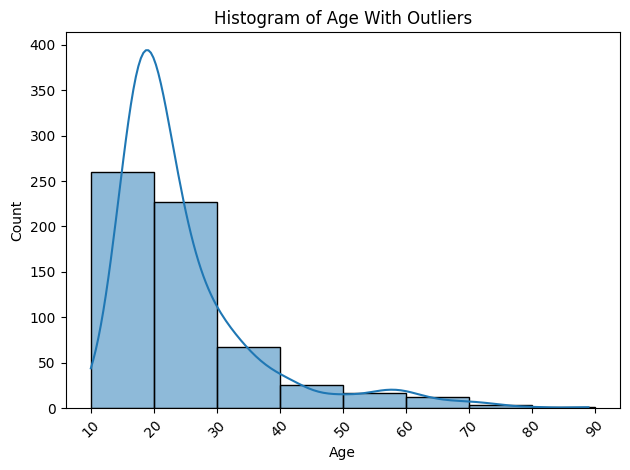

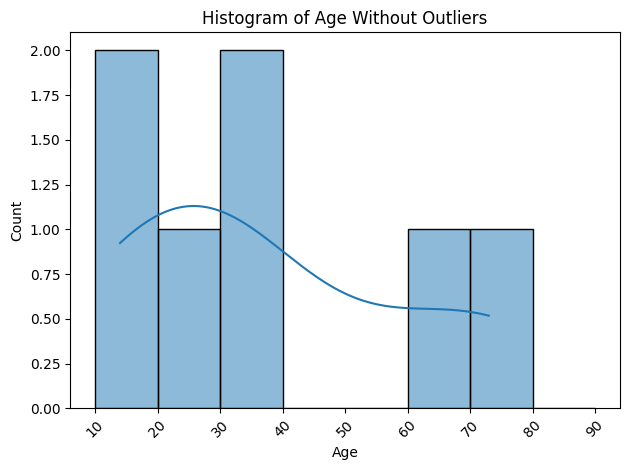

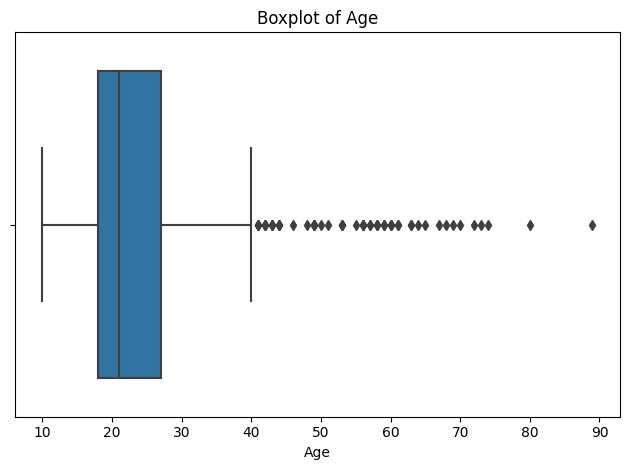

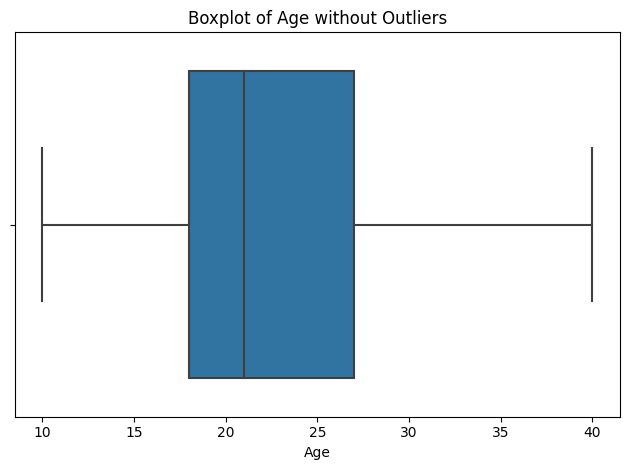

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_age = df[(df['Age'] >= lower_bound) & (df['BPM'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="Age", bins=list(range(10, 100, 10)), kde = True)
plt.xticks(list(range(10, 100, 10)), rotation=45)
plt.title("Histogram of Age With Outliers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plotting using the computed bin edges
sns.histplot(data=filtered_df_age, x="Age", bins=list(range(10, 100, 10)), kde = True)
plt.xticks(list(range(10, 100, 10)), rotation=45)
plt.title("Histogram of Age Without Outliers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'Age' column
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["Age"], showfliers=False)
plt.title("Boxplot of Age without Outliers")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

#### Hours Per Day

In [146]:
distribution_numerical('Hours per day')

Skewness: 2.46
Kurtosis: 10.07
Q1: 2.0
Q2: 3.0
Q3: 5.0
IQR: 3.0
Lower Outlier Limit: No lower limit
Upper Outlier Limit: 10


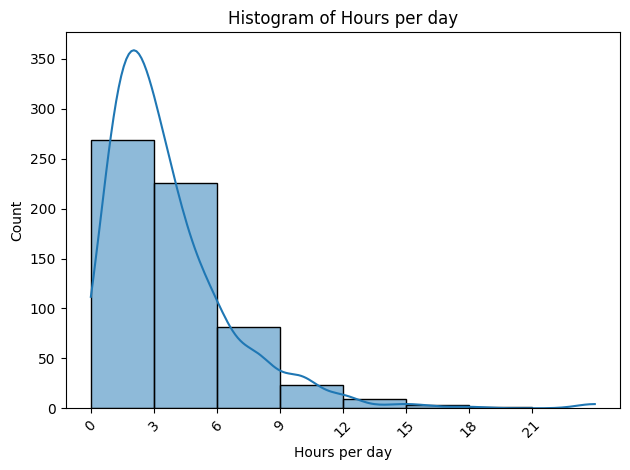

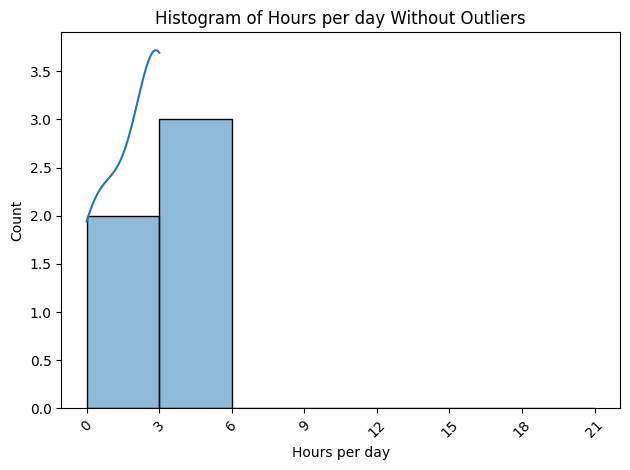

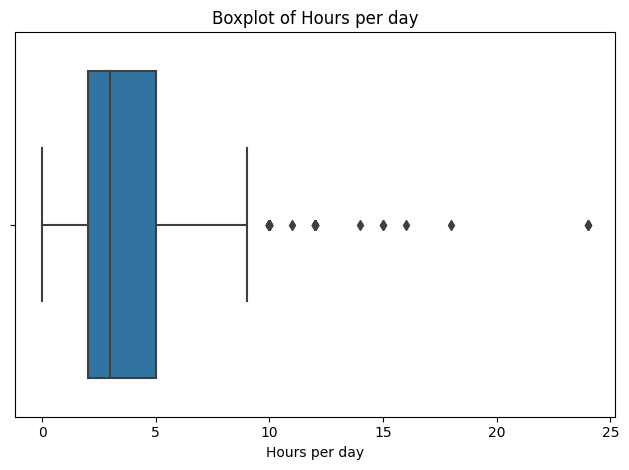

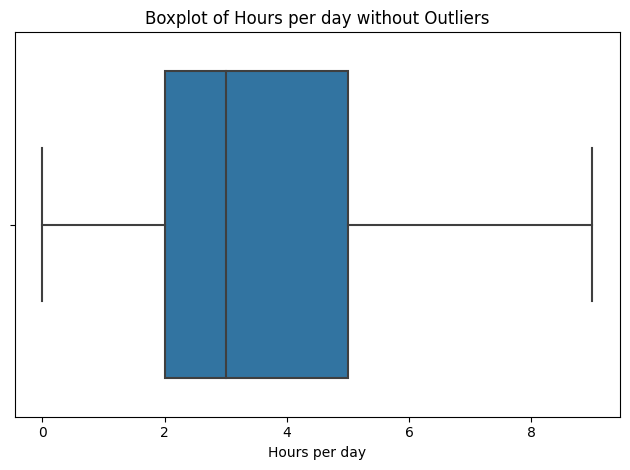

In [147]:
# Creating a boxplot for the 'Hours per day' column
Q1 = df['Hours per day'].quantile(0.25)
Q3 = df['Hours per day'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_hours = df[(df['Hours per day'] >= lower_bound) & (df['BPM'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="Hours per day", bins=list(range(0, 24, 3)), kde = True)
plt.xticks(list(range(0, 24, 3)), rotation=45)
plt.title("Histogram of Hours per day")
plt.xlabel("Hours per day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plotting using the computed bin edges
sns.histplot(data=filtered_df_hours, x="Hours per day", bins = list(range(0, 24, 3)), kde = True)
plt.xticks(list(range(0, 24, 3)), rotation=45)
plt.title("Histogram of Hours per day Without Outliers")
plt.xlabel("Hours per day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'Hours per day' column

sns.boxplot(x=df["Hours per day"])

plt.title("Boxplot of Hours per day")
plt.xlabel("Hours per day")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["Hours per day"], showfliers=False)

plt.title("Boxplot of Hours per day without Outliers")
plt.xlabel("Hours per day")
plt.tight_layout()
plt.show()

#### BPM

In [148]:
distribution_numerical('BPM')

Skewness: 3.24
Kurtosis: 40.63
Q1: 100.0
Q2: 120.0
Q3: 144.0
IQR: 44.0
Lower Outlier Limit: 34.0
Upper Outlier Limit: 210


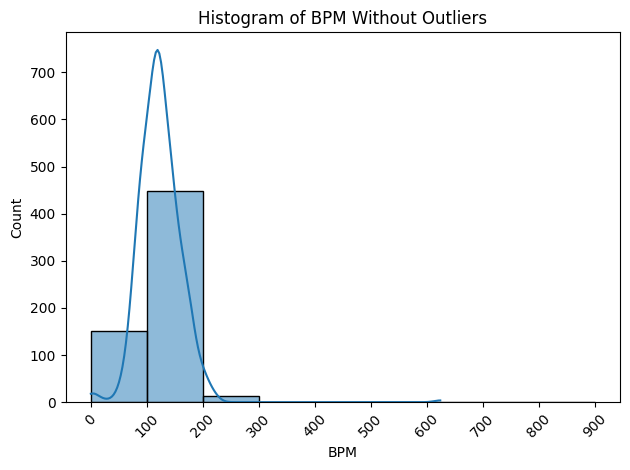

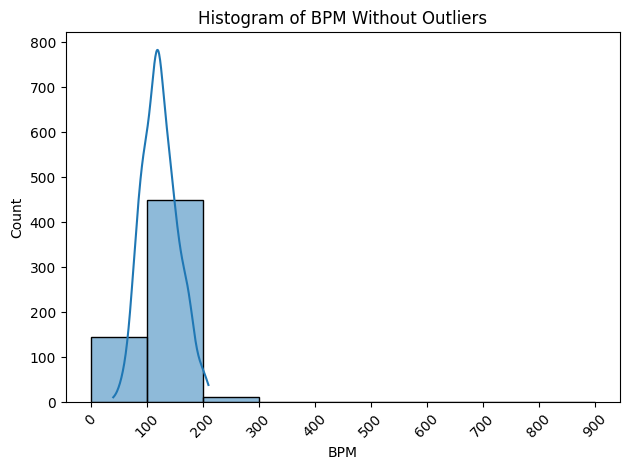

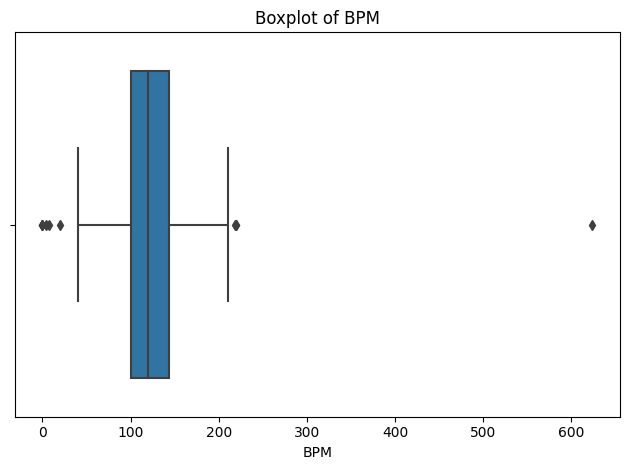

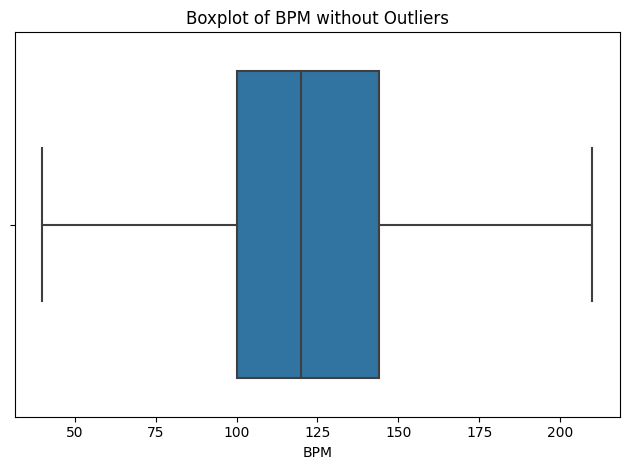

In [149]:
# Creating a boxplot for the 'BPM' column
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_bpm = df[(df['BPM'] >= lower_bound) & (df['BPM'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="BPM", bins = list(range(0, 1000, 100)), kde = True)
plt.xticks(list(range(0, 1000, 100)), rotation=45)
plt.title("Histogram of BPM Without Outliers")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.histplot(data=filtered_df_bpm, x="BPM", bins = list(range(0, 1000, 100)), kde = True)
plt.xticks(list(range(0, 1000, 100)), rotation=45)
plt.title("Histogram of BPM Without Outliers")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'BPM' column
sns.boxplot(x=df["BPM"])
plt.title("Boxplot of BPM")
plt.xlabel("BPM")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["BPM"], showfliers=False)
plt.title("Boxplot of BPM without Outliers")
plt.xlabel("BPM")
plt.tight_layout()
plt.show()

### Anxiety

In [150]:
distribution_numerical('Anxiety')

Skewness: -0.42
Kurtosis: -0.73
Q1: 4.0
Q2: 6.0
Q3: 8.0
IQR: 4.0
Lower Outlier Limit: No lower limit
Upper Outlier Limit: No upper limit


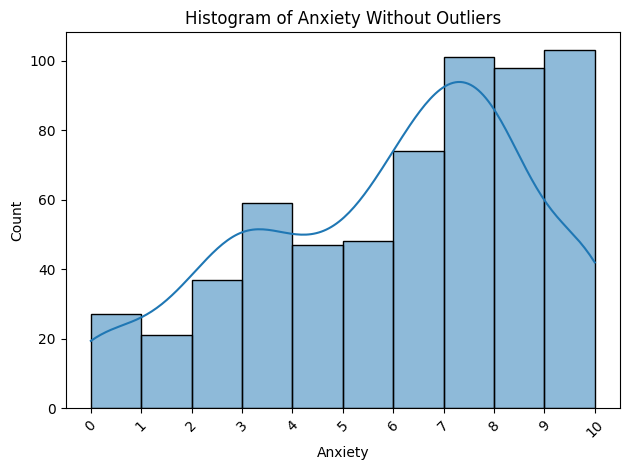

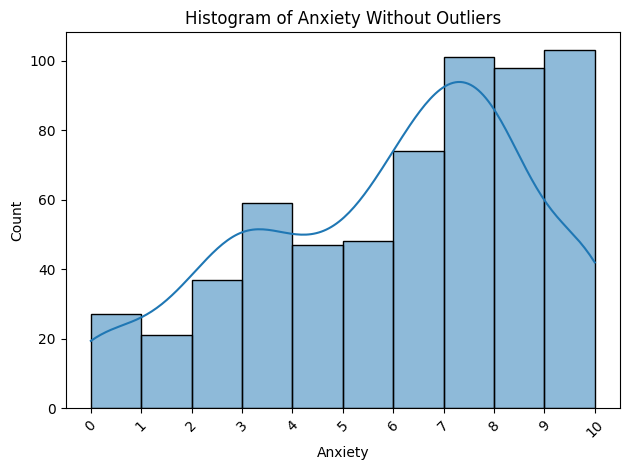

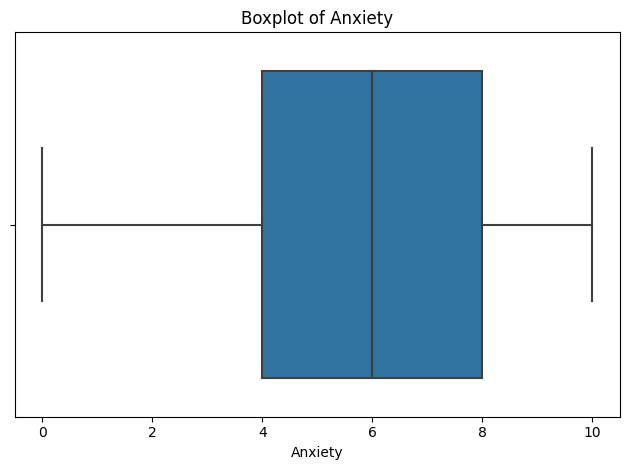

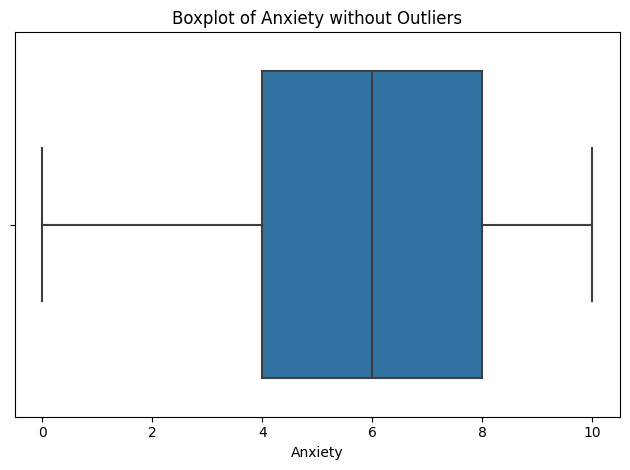

In [153]:
# Creating a boxplot for the 'BPM' column
Q1 = df['Anxiety'].quantile(0.25)
Q3 = df['Anxiety'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_anxiety = df[(df['Anxiety'] >= lower_bound) & (df['Anxiety'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="Anxiety", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Anxiety Without Outliers")
plt.xlabel("Anxiety")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.histplot(data=filtered_df_anxiety, x="Anxiety", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Anxiety Without Outliers")
plt.xlabel("Anxiety")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'BPM' column
sns.boxplot(x=df["Anxiety"])
plt.title("Boxplot of Anxiety")
plt.xlabel("Anxiety")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["Anxiety"], showfliers=False)
plt.title("Boxplot of Anxiety without Outliers")
plt.xlabel("Anxiety")
plt.tight_layout()
plt.show()

### Depression

In [ ]:
distribution_numerical('Depression')

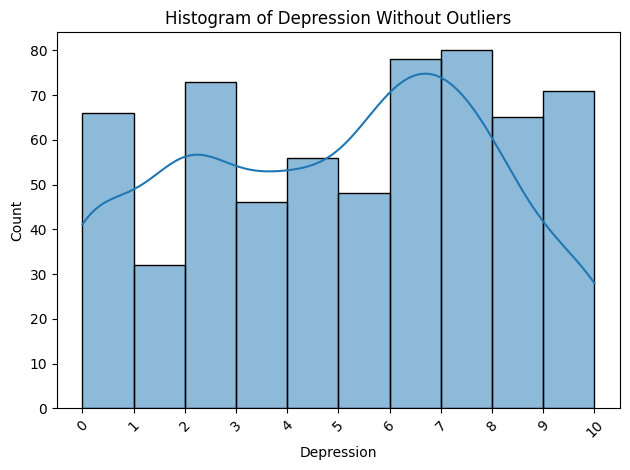

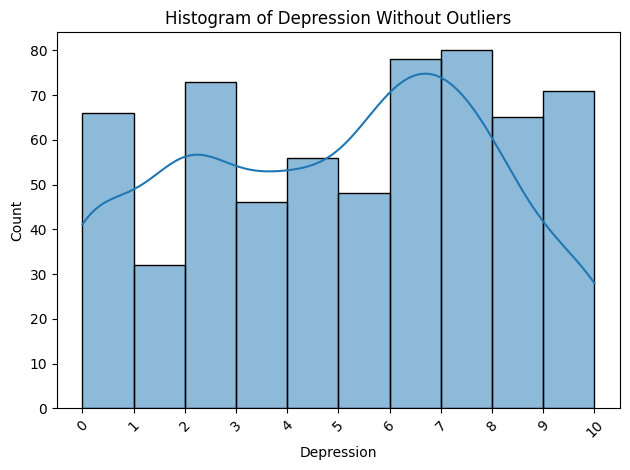

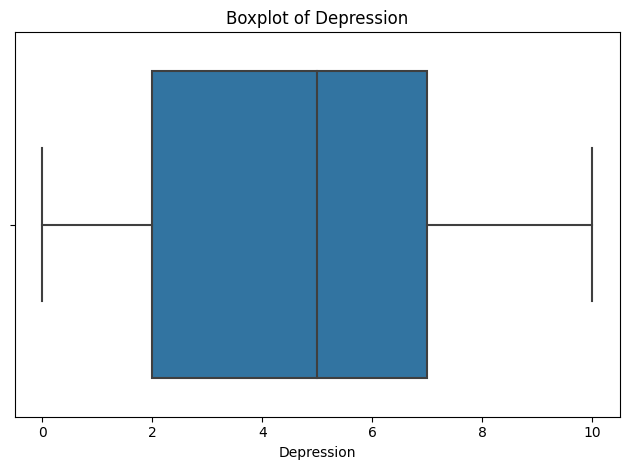

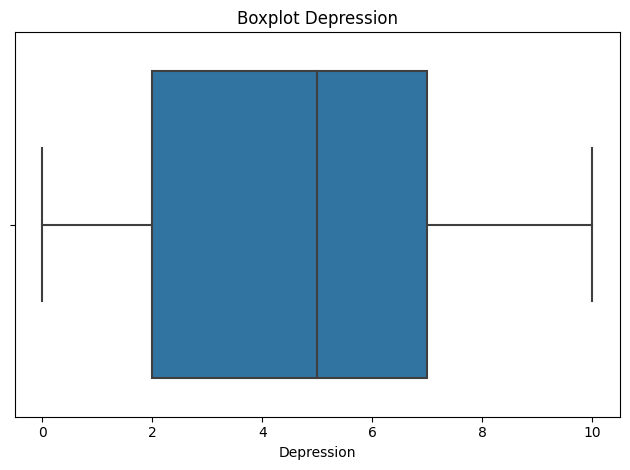

In [154]:
# Creating a boxplot for the 'BPM' column
Q1 = df['Depression'].quantile(0.25)
Q3 = df['Depression'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_depression = df[(df['Depression'] >= lower_bound) & (df['Depression'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="Depression", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Depression Without Outliers")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.histplot(data=filtered_df_depression, x="Depression", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Depression Without Outliers")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'BPM' column
sns.boxplot(x=df["Depression"])
plt.title("Boxplot of Depression")
plt.xlabel("Depression")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["Depression"], showfliers=False)
plt.title("Boxplot Depression")
plt.tight_layout()
plt.show()

### Insomnia

In [ ]:
distribution_numerical('Insomnia')

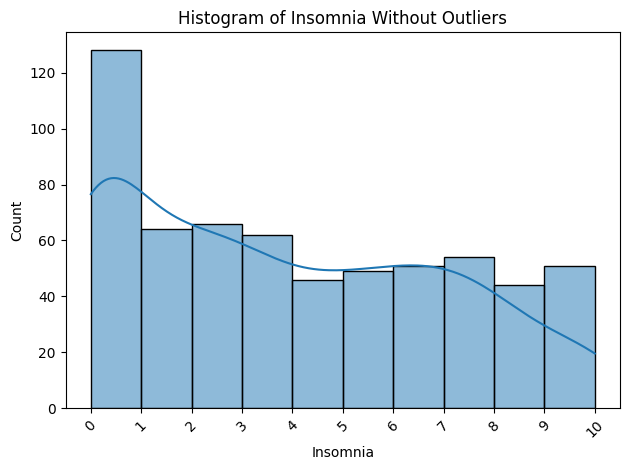

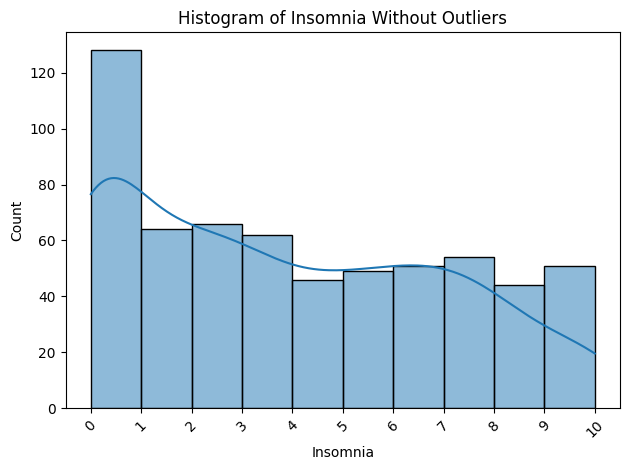

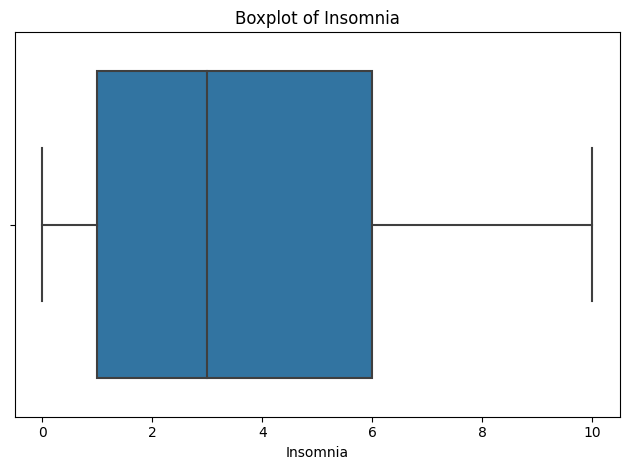

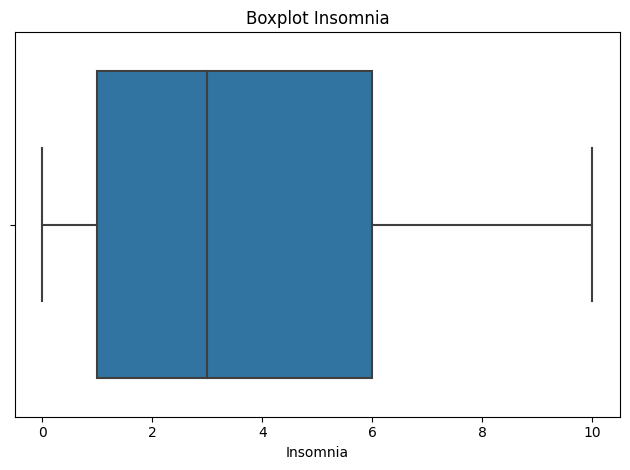

In [155]:
# Creating a boxplot for the 'BPM' column
Q1 = df['Insomnia'].quantile(0.25)
Q3 = df['Insomnia'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_insomnia = df[(df['Insomnia'] >= lower_bound) & (df['Insomnia'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="Insomnia", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Insomnia Without Outliers")
plt.xlabel("Insomnia")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.histplot(data=filtered_df_insomnia, x="Insomnia", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of Insomnia Without Outliers")
plt.xlabel("Insomnia")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'BPM' column
sns.boxplot(x=df["Insomnia"])
plt.title("Boxplot of Insomnia")
plt.xlabel("Insomnia")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["Insomnia"], showfliers=False)
plt.title("Boxplot Insomnia")
plt.xlabel("Insomnia")
plt.tight_layout()
plt.show()

### OCD

In [ ]:
distribution_numerical('OCD')

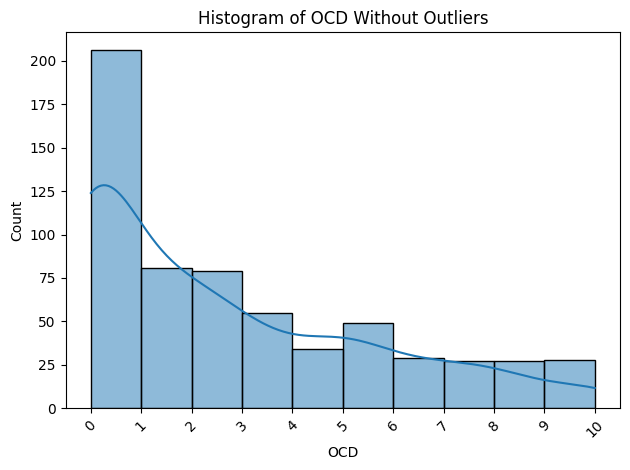

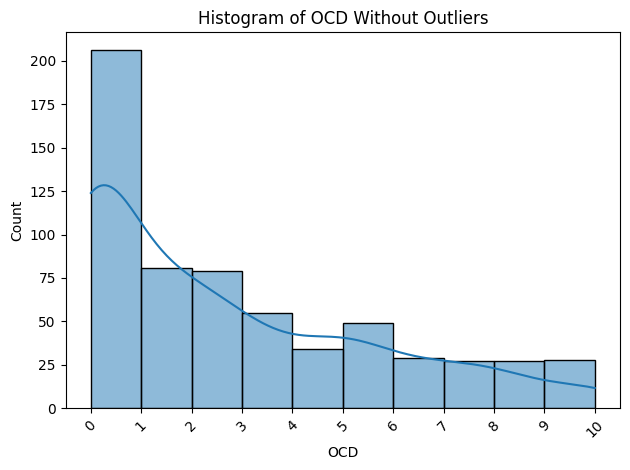

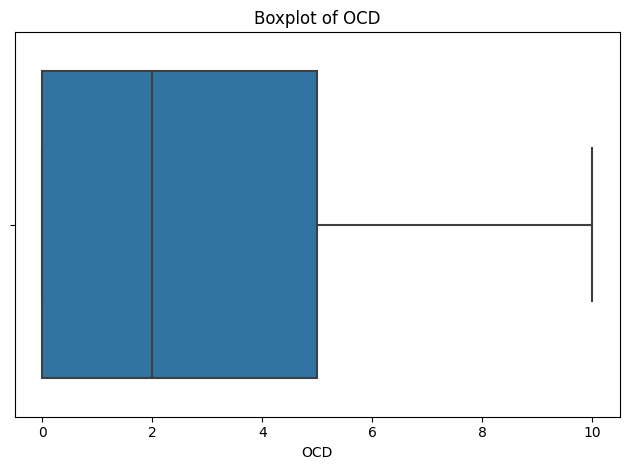

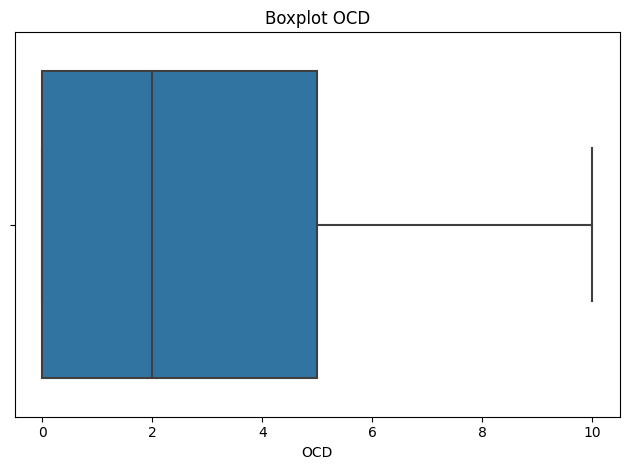

In [156]:
# Creating a boxplot for the 'BPM' column
Q1 = df['OCD'].quantile(0.25)
Q3 = df['OCD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df_ocd = df[(df['OCD'] >= lower_bound) & (df['OCD'] <= upper_bound)]

# Plotting with and without outliers
sns.histplot(data=df, x="OCD", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of OCD Without Outliers")
plt.xlabel("OCD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.histplot(data=filtered_df_ocd, x="OCD", bins = list(range(0, 11, 1)), kde = True)
plt.xticks(list(range(0, 11, 1)), rotation=45)
plt.title("Histogram of OCD Without Outliers")
plt.xlabel("OCD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Creating a boxplot for the 'BPM' column
sns.boxplot(x=df["OCD"])
plt.title("Boxplot of OCD")
plt.xlabel("OCD")
plt.tight_layout()
plt.show()

sns.boxplot(x=df["OCD"], showfliers=False)
plt.title("Boxplot OCD")
plt.xlabel("OCD")
plt.tight_layout()
plt.show()

### Correlation

#### Normality Test

In [131]:
from scipy.stats import kstest, norm

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Perform K-S test for each numeric column
for col in numeric_cols.columns:
  statistic, p_value = kstest(numeric_cols[col], 'norm')
  if p_value > 0.05:
    print(f"{col} is likely normally distributed (Statistic: {statistic:.5f}, P-value: {p_value:.5f}")
  else:
    print(f"{col} is likely not normally distributed (Statistic: {statistic:.5f}, P-value: {p_value:.5f}")

Age is likely not normally distributed (Statistic: 1.00000, P-value: 0.00000
Hours per day is likely not normally distributed (Statistic: 0.80557, P-value: 0.00000
BPM is likely not normally distributed (Statistic: 0.99509, P-value: 0.00000
Anxiety is likely not normally distributed (Statistic: 0.89920, P-value: 0.00000
Depression is likely not normally distributed (Statistic: 0.81790, P-value: 0.00000
Insomnia is likely not normally distributed (Statistic: 0.66505, P-value: 0.00000
OCD is likely not normally distributed (Statistic: 0.51058, P-value: 0.00000


#### Spearman's Correlation (data is not normally disributed)

In [132]:
print(round(df.corr(numeric_only = True, method = 'spearman'), 2))

                Age  Hours per day   BPM  Anxiety  Depression  Insomnia   OCD
Age            1.00          -0.14  0.01    -0.10        0.04      0.02 -0.11
Hours per day -0.14           1.00  0.01     0.09        0.12      0.13  0.13
BPM            0.01           0.01  1.00     0.04        0.05      0.07 -0.02
Anxiety       -0.10           0.09  0.04     1.00        0.52      0.28  0.34
Depression     0.04           0.12  0.05     0.52        1.00      0.37  0.16
Insomnia       0.02           0.13  0.07     0.28        0.37      1.00  0.22
OCD           -0.11           0.13 -0.02     0.34        0.16      0.22  1.00


#### Visualizations

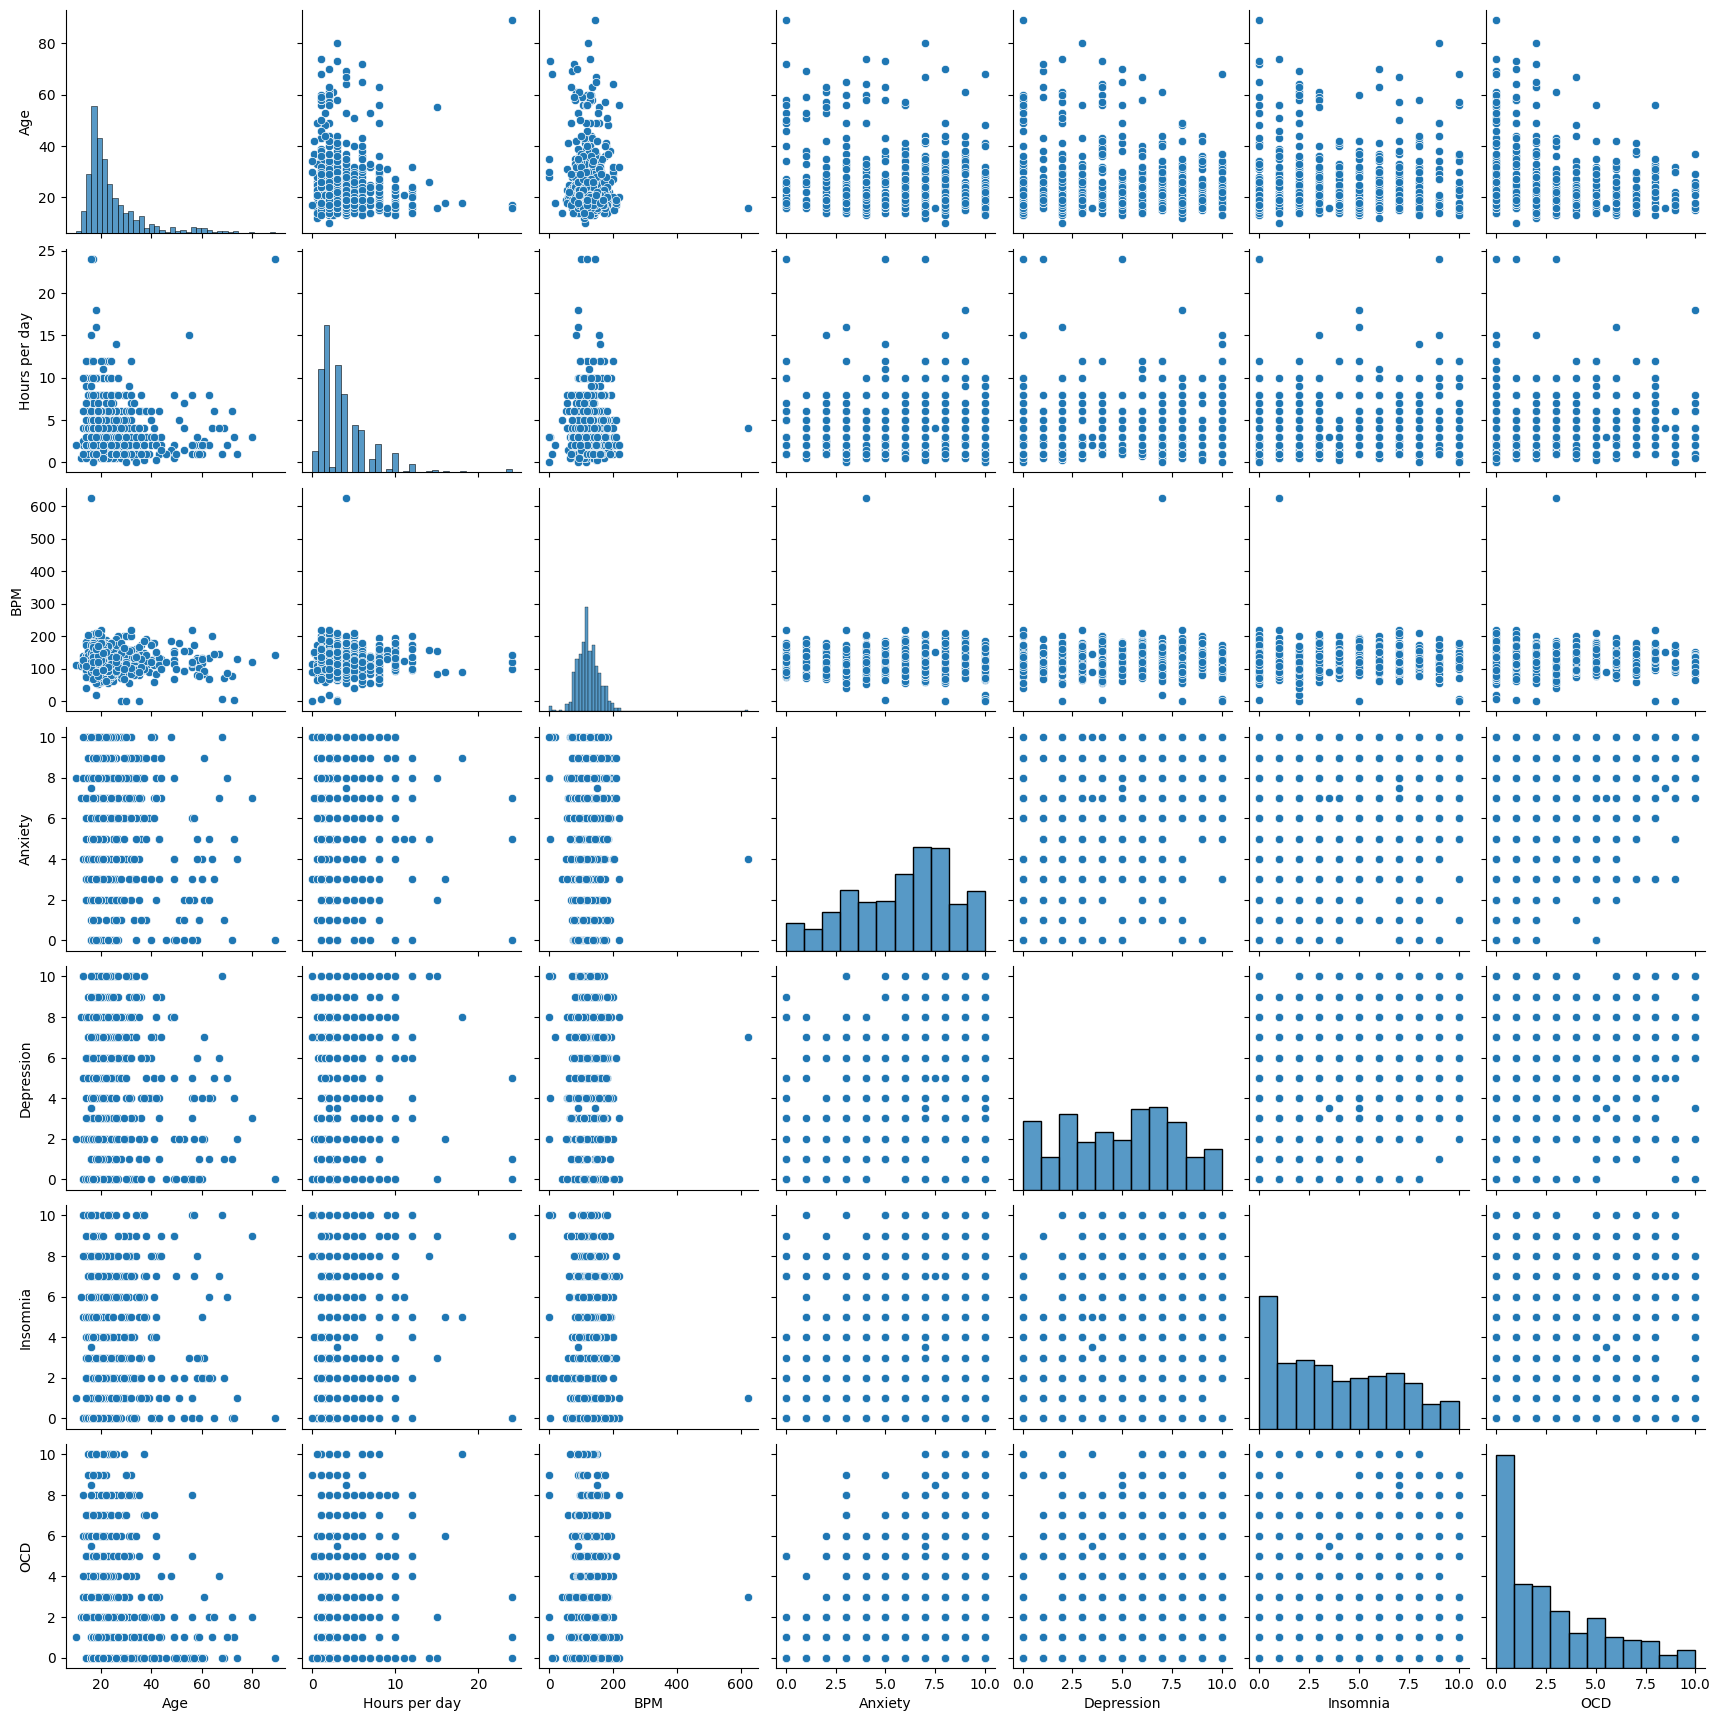

In [136]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

## Breakdown of Categorical Variables

In [28]:
def describe_categorical(column_name):
    """Describe statistics for the specified categorical column of the given DataFrame."""

    # Check if column is numeric
    if df[column_name].dtype in ['int64', 'float64']:
      print("Not a categorical variable")
      return
